# Testing Environment for Eurus
Shaun Hadden & Brendan Smithyman | October, 2015

## Imports

In [1]:
import numpy as np
from zephyr.backend import Eurus, StackedSimpleSource

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
matplotlib.rcParams['savefig.dpi'] = 150 # Change this to adjust figure size

## Helper functions

## Modelling setup

In [3]:
# Geometry parameters
dx          = 1.
dz          = 1.
nx          = 100
nz          = 200

# Bulk parameters
velocity    = 2000.     * np.ones((nz,nx))
density     = 1.        * np.ones((nz,nx))

# Anisotropy parameters
theta       = 0.        * np.ones((nz,nx))
epsilon     = 0.       * np.ones((nz,nx))
delta       = 0.       * np.ones((nz,nx))

# Other parameters
freq        = 200.
freeSurf    = [False, False, False, False]
nPML        = 10



# Pack values into systemConfig dictionary
systemConfig = {
    'nx':       nx,
    'nz':       nz,
    'dx':       dx,
    'dz':       dz,

    'c':        velocity,
    'rho':      density,
    
    'theta':    theta,
    'eps':      epsilon,
    'delta':    delta,

    'freq':     freq,
    'freeSurf': freeSurf,
    'nPML':     nPML,
    'cPML':     1e3,
}

## Testing

In [4]:
Ainv = Eurus(systemConfig)
src = StackedSimpleSource(systemConfig)

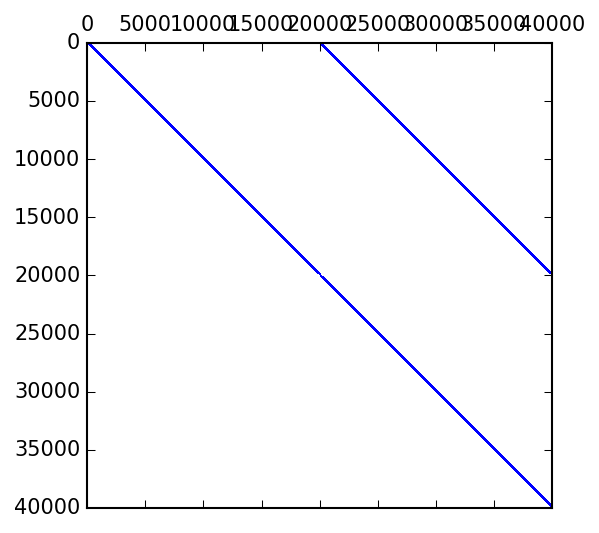

In [5]:
plt.spy(Ainv.A, markersize=0.1, marker=',')

In [6]:
q = src(np.array([[50,100]]))
u = Ainv*q

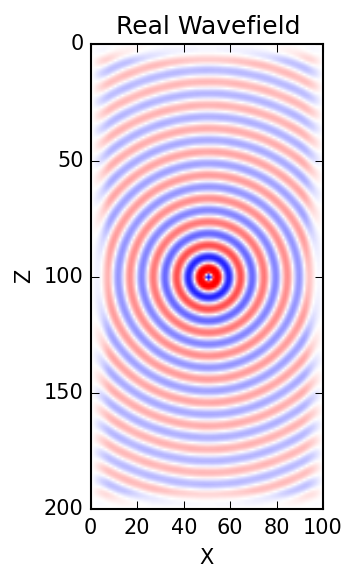

In [7]:
clip = 1e-1

plotopts = {
    'extent':   [0, nx*dx, nz*dz, 0],
    'cmap':     cm.bwr,
    'vmin':     -clip,
    'vmax':     clip,
}

fig = plt.figure()

ax = fig.add_subplot(1,1,1, aspect=1)
plt.imshow(u[:nx*nz].reshape((nz,nx)).real, **plotopts)
plt.title('Real Wavefield')
plt.xlabel('X')
plt.ylabel('Z')